#Example for data fitting with errors in x and y

scipy.optmize.curve_fit uses standard non-linear least squares optimization and therefore only minimizes the deviation in the response variables. If you want to have an error in the independent variable to be considered you can try scipy.odr which uses orthogonal distance regression. As its name suggests it minimizes in both independent and dependent variables.

The fit_type parameter determines whether scipy.odr does full ODR (fit_type=0) or least squares optimization (fit_type=2). 

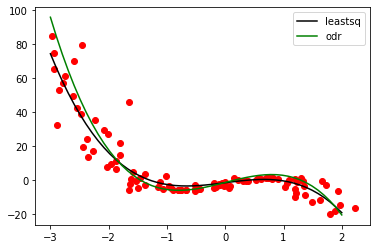

In [2]:
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from pylab import *

def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

#generate data
x = np.linspace(-3,2,100)
y = func([-2.3,7.0,-4.0], x)

# add some noise
x += np.random.normal(scale=0.3, size=100)
y += np.random.normal(scale=0.1, size=100)

data = RealData(x, y, 0.3, 0.1)
model = Model(func)

odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
output = odr.run()

xn = np.linspace(-3,2,50)
yn = func(output.beta, xn)
plot(x,y,'ro')
plot(xn,yn,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
yn = func(output.beta, xn)
plot(xn,yn,'g-',label='odr')
legend(loc=0)